#### COMS 4281 - Intro to Quantum Computing 

# Problem Set 1, Quantum Info Basics

### Due: October 10, 11:59pm
Collaboration is allowed and encouraged (teams of at most 3).  Please read the syllabus carefully for the guidlines regarding collaboration.  In particular, everyone must write their own solutions in their own words.

### AI Policy

You may use AI/LLMs as a study aid, but not as a substitute for your own work. Quizzes and problem sets are practice for the midterm and final (70% of your grade), which you must do without any external help. Use AI wisely: ask it to explain, critique, or suggest alternatives — not just to give you the answer. Everything you submit must be something you understand and could explain to a peer without notes.

### Write your collaborators here:

$\renewcommand{\ket}[1]{\left|{#1}\right\rangle} \renewcommand{\bra}[1]{\left\langle{#1}\right|}$
$\renewcommand{\C}{{\mathbb{C}}}$
$\renewcommand{\N}{{\mathbb{N}}}$
$\renewcommand{\Z}{{\mathbb{Z}}}$


### Recommended Environment to Run This Notebook

We highly recommend that you use the [qBraid](http://www.qbraid.com) platform to run this Jupyter notebook. This supports Qiskit, and furthermore to render your Problem Set solutions to PDF, you have to do the following:

1. File > Save and Export Notebook As > HTML
2. Save the HTML file somewhere on your local computer
3. Open the HTML file using your favorite browser, and Print to PDF. We recommend using Landscape mode so the Python code shows up better.

# Problem 1: Simulating Classical Circuits in Quantum Circuits

In this problem we will see that quantum computers can efficiently simulate classical computers, so anything a classical computer can do, so can a quantum computer. We will get hands on experience with how to translate classical circuits to quantum circuits.

__a)__. The basic components of a classical (non-reversible) circuit include AND, XOR, NOT gates. You may recall from some other CS/EE class that every classical circuit can be built from a combination of AND, XOR, NOT gates (in fact, AND and NOT suffice). 

We can't use AND gates in a quantum circuit because they're not reversible, but we can use a _reversible_ version of AND. Let $R_\wedge$ denote the 3-bit reversible version of AND, which is the map $(a,b,c) \mapsto (a,b,c \oplus a \wedge b)$. This is also known as the TOFFOLI gate.

Fill in Python code between "### YOUR CODE BEGINS ###" and "### YOUR CODE ENDS ####" to implement TOFFOLI. The inputs are three binary bits, and the outputs should be three binary bits. Your solution should be no more than 3 lines of code.

While you're at it, also fill in the code for CNOT, which maps $(a,b) \mapsto (a,a \oplus b)$ and X, which maps $a \mapsto \neg a$.

Run the following code to print out the truth-table of your reversible AND (i.e. TOFFOLI) function:

In [20]:
def TOFFOLI(a,b,c):

    ### YOUR CODE BEGINS ####
    c = c ^ (a & b)
    ### YOUR CODE ENDS ###
    return (a,b,c)

def CNOT(a,b):
    ### YOUR CODE BEGINS ####
    b = a ^ b
    ### YOUR CODE ENDS ###
    return a,b

def X(a):
    ### YOUR CODE BEGINS ####
    a = a ^ 1
    ### YOUR CODE ENDS ###
    return a
    

In [21]:
import itertools

print(" a b c  ->  a' b' c' ")
for a, b, c in itertools.product([0,1], repeat=3):
    a_out, b_out, c_out = TOFFOLI(a, b, c)
    print(f" {a} {b} {c}  ->   {a_out} {b_out} {c_out}")

 a b c  ->  a' b' c' 
 0 0 0  ->   0 0 0
 0 0 1  ->   0 0 1
 0 1 0  ->   0 1 0
 0 1 1  ->   0 1 1
 1 0 0  ->   1 0 0
 1 0 1  ->   1 0 1
 1 1 0  ->   1 1 1
 1 1 1  ->   1 1 0


__b)__. Consider the 3-bit function known as the "2-to-1 multiplexer", or 2TO1MUX, which maps $(x_0,x_1,b)$ to $x_b$. In other words, the last bit is a "selector bit" that chooses to output the first or second bit.

The following circuit diagram shows a classic way to implement this using AND, OR, and NOT gates. Note that the input bit $b$ gets copied into two wires in the beginning.

<img src="mux.png" width=350 />

Now, implement 2TO1MUX as a **reversible circuit**, by converting each of the AND/OR/NOT gates above into reversible equivalents, using only `TOFFOLI`, `CNOT`, and `X` as basic gates. You should introduce extra ancilla bits. In the end, you should have designed a reversible circuit that computes the following:

$$ (x_0,x_1,b,c,\cdots,0) \mapsto (x_0,x_1,b,c \oplus x_b, junk)$$

where $c$ denotes the target bit, the $0,\cdots,0$ bits denote the ancilla bits being set to $0$. The target bit should have the final answer $c \oplus x_b$ and the ancilla bits will contain any scratch work (denoted "junk"). We don't care what value "junk" is.

In [24]:
def reversible_2TO1MUX(x0,x1,b,c,ancs):
    """
    x0, x1 : data inputs
    b      : selector
    c      : target bit
    ancs   : list of ancillas
    """    
    # ancs is just a list of however many ancillas you passed in
    # e.g. if you called with 3 ancillas, ancs = [0,0,0]

    # In your code, you can only call TOFFOLI, CNOT, and X
    # on different subset of input bits and ancilla bits. You cannot perform 
    # any logic outside of calling these three functions!

    # for example, all your lines should have the following form
    # x0,b,ancs[0] = TOFFOLI(x0,b,ancs[0])
    # ancs[1] = X(ancs[1])
    # i.e., the inputs arguments should also match the output arguments.

    # Important note: the only variables you can use are x0,x1,b,c, and the ancs array. 
    # You CANNOT create any new variables aside from these!

    ### YOUR CODE BEGINS ####
    # a or b = X(TOFFOLI(X(a), X(b)))
    x1, b, ancs[1] = TOFFOLI(x1, b, ancs[1])
    b = X(b)
    x0, b, ancs[0] = TOFFOLI(x0, b, ancs[0])
    # c xor (ancs[0] or ancs[1]) = c xor (~(~ancs[0] and ~ancs[1]))
    # = (~c xor (~ancs))
    ancs[0] = X(ancs[0])
    ancs[1] = X(ancs[1])
    c = X(c)
    ancs[0], ancs[1], c = TOFFOLI(ancs[0], ancs[1], c)
    b = X(b)

    ### YOUR CODE ENDS ####
    
    return (x0,x1,b,c,ancs)

The following will print out the truth table of your reversible 2-to-1 multiplexer implementation, when the target bit `c` and the ancilla bits `ancs` are set to 0 to begin with. You'll need to set `NUM_ANCILLAS` below to the correct number. 

In [25]:
### YOUR CODE BEGINS ###

NUM_ANCILLAS = 2

### YOUR CODE ENDS ###

print(" x0 x1 b ->  x0 x1 b c ancillas")

for x0, x1, b in itertools.product([0,1], repeat=3):
    c = 0
    ancs = [0] * NUM_ANCILLAS   # e.g. [0,0,0] if NUM_ANCILLAS=3
    outputs = reversible_2TO1MUX(x0, x1, b, c, ancs)

    # outputs is a tuple: (x0', x1', b', c', ancilla1', ancilla2', ...)
    print(f" {x0} {x1} {b}  ->   {outputs}")
    

 x0 x1 b ->  x0 x1 b c ancillas
 0 0 0  ->   (0, 0, 0, 0, [1, 1])
 0 0 1  ->   (0, 0, 1, 0, [1, 1])
 0 1 0  ->   (0, 1, 0, 0, [1, 1])
 0 1 1  ->   (0, 1, 1, 1, [1, 0])
 1 0 0  ->   (1, 0, 0, 1, [0, 1])
 1 0 1  ->   (1, 0, 1, 0, [1, 1])
 1 1 0  ->   (1, 1, 0, 1, [0, 1])
 1 1 1  ->   (1, 1, 1, 1, [1, 0])


__c)__. In your implementation, your ancilla bits likely contain some junk data that depends on the inputs. It would be nice to clean up the scratch work so that the ancillas return to zero (we assume they started in the zero state), so that 

$$ (x_0,x_1,b,0,\cdots,0) \mapsto (x_0,x_1,b,x_b, 0,\cdots,0)$$

This is called "clean computation", for obvious reasons. We will figure out a way to generically convert an unclean implementation of `reversible_2TO1MUX` into a clean one. 

First, we need to implement the _inverse_ transformation of `reversible_2TO1MUX`. That is, first performing `reversible_2TO1MUX` and then `reversible_2TO1MUX_inverse` should yield the identity transformation on _all_ bits (including the target and ancilla bits). 

Implement the inverse below. Note: it is unlikely your implementation of `reversible_2TO1MUX` is its own inverse!

In [26]:
def reversible_2TO1MUX_inverse(x0,x1,b,c,ancs):
    """
    x0, x1 : data inputs
    b      : selector
    c      : target bit
    ancs   : list of ancillas
    """    
    # ancs is just a list of however many ancillas you passed in
    # e.g. if you called with 3 ancillas, ancs = [0,0,0]


    # In your code, you can only call TOFFOLI, CNOT, and X
    # on different subset of input bits and ancilla bits. You cannot perform 
    # any logic outside of calling these three functions!

    ### YOUR CODE BEGINS ####
    c = X(c)
    ancs[0], ancs[1], c = TOFFOLI(ancs[0], ancs[1], c)

    ancs[1] = X(ancs[1])
    x1, b, ancs[1] = TOFFOLI(x1, b, ancs[1])
    
    ancs[0] = X(ancs[0])
    b = X(b)
    x0, b, ancs[0] = TOFFOLI(x0, b, ancs[0])
    b = X(b)
    ### YOUR CODE ENDS ####
    
    return (x0,x1,b,c,ancs)

The following code will check whether your inverse implementation works.

In [27]:
print("Checking reversible_2TO1MUX followed by its inverse equals identity...")
ok = True
for x0, x1, b in itertools.product([0,1], repeat=3):
    c = 0
    ancs = [0] * NUM_ANCILLAS   # e.g. (0,0,0) if NUM_ANCILLAS=3
    
    x0_copy,x1_copy,b_copy,c_copy,ancs_copy = reversible_2TO1MUX(x0, x1, b, c, ancs)
    x0_copy,x1_copy,b_copy,c_copy,ancs_copy = reversible_2TO1MUX_inverse(x0_copy,x1_copy,b_copy,c_copy,ancs_copy)

    if (x0_copy != x0) or (x1_copy != x1) or (b_copy != b) or (c_copy != c) or (ancs_copy != ancs):
        ok = False
        print("Mismatch")
        
print("OK!" if ok else "Found mismatches.")

Checking reversible_2TO1MUX followed by its inverse equals identity...
OK!


__d)__. Now implement a clean version of 2TO1MUX, by only making calls to `reversible_2TO1MUX`, `reversible_2TO1MUX_inverse`, and one call to `CNOT`. You should introduce at least one extra ancilla bit.

In [28]:
def reversible_2TO1MUX_clean(x0,x1,b,c,ancs):
    """
    x0, x1 : data inputs
    b      : selector
    c      : target bit
    ancs   : list of ancillas
    """    
    # ancs is just a list of however many ancillas you passed in
    # e.g. if you called with 3 ancillas, ancs = [0,0,0]


    # In your code, you can only make a call to reversible_2TO1MUX,
    # reversible_2TO1MUX_inverse, and CNOT. No other gates are allowed.

    ### YOUR CODE BEGINS ####
    x0, x1, b, c, ancs[:2] = reversible_2TO1MUX(x0, x1, b, c, ancs[:2])
    c, ancs[2] = CNOT(c, ancs[2])
    x0, x1, b, ancs[2], ancs[:2] = reversible_2TO1MUX_inverse(x0, x1, b, ancs[2], ancs[:2])

    ### YOUR CODE ENDS ####
    
    return (x0,x1,b,c,ancs)

The following will print out the truth table; use this to check your work. The ancilla bits should end up all zeroes at the end. Set `NUM_ANCILLAS_CLEAN` to the right number.

In [29]:
### YOUR CODE BEGINS ###

NUM_ANCILLAS_CLEAN = 3

### YOUR CODE ENDS ###

print(" x0 x1 b ->  x0 x1 b c ancillas")

for x0, x1, b in itertools.product([0,1], repeat=3):
    c = 0
    ancs = [0] * NUM_ANCILLAS_CLEAN   # e.g. (0,0,0) if NUM_ANCILLAS=3
    outputs = reversible_2TO1MUX_clean(x0, x1, b, c, ancs)

    # outputs is a tuple: (x0', x1', b', c', ancilla1', ancilla2', ...)
    print(f" {x0} {x1} {b}  ->   {outputs}")
    

 x0 x1 b ->  x0 x1 b c ancillas
 0 0 0  ->   (0, 0, 0, 0, [0, 0, 0])
 0 0 1  ->   (0, 0, 1, 0, [0, 0, 0])
 0 1 0  ->   (0, 1, 0, 0, [0, 0, 0])
 0 1 1  ->   (0, 1, 1, 1, [0, 0, 0])
 1 0 0  ->   (1, 0, 0, 1, [0, 0, 0])
 1 0 1  ->   (1, 0, 1, 0, [0, 0, 0])
 1 1 0  ->   (1, 1, 0, 1, [0, 0, 0])
 1 1 1  ->   (1, 1, 1, 1, [0, 0, 0])


__e)__. Let's generalize this. Suppose you're given a classical circuit $C$, consisting of AND, NOT gates, that acts on $n$ input bits $(x_1,\ldots,x_n)$, and computes a boolean function $f:\{0,1\}^n \to \{0,1\}$. Suppose there are $r$ AND gates, $s$ NOT gates, and $t$ "fan-out" operations (i.e., a wire gets split into two wires carrying the same value). 

Suppose you convert this to a reversible circuit that computes $R_f$ cleanly, and this circuit uses TOFFOLI, CNOT, and X gates. 

1. How many TOFFOLI gates did you use?
2. How many CNOT gates did you use?
3. How many X gates did you use?
4. How many ancilla bits did you introduce in total?

Give a precise count in terms of $r,s,t$ and explain your reasoning.

### Your solution ###

1. $r$ TOFFOLI gates. 1 TOFFOLI and 1 extra bit is corresponding to 1 AND gate
2. $t$ CNOT gates. 1 CNOT gate and 1 extra bit is corresponding to 1 "fan-out" operation.
3. $s$ X gates. 1 X gate is corresponding to 1 NOT gate.
4. According to 1. and 2., the circuit $r + t$ extra bits but one of them is the input bit to save output. So I introduce $r + t - 1$ ancilla bits in total

# Problem 2: No-Cloning

__a)__. Let $\ket{a} = \alpha_0 \ket{0} + \alpha_1 \ket{1}$ and $\ket{b} = \beta_0 \ket{0} + \beta_1 \ket{1}$ be qubit states. Suppose that $|\langle a | b \rangle| \notin \{0,1\}$, i.e., they are not orthogonal nor identical up to phase.

Prove that there is no 2-qubit unitary $U$ that clones $\{\ket{a},\ket{b}\}$, i.e., 
$$
    U\ket{a} \ket{0} = \ket{a} \ket{a} \qquad \text{and} \qquad U \ket{b} \ket{0} = \ket{b} \ket{b}
$$


### Your solution ###

Assume there is unitary $U$, which let $U|a\rangle|0\rangle = |a\rangle|a\rangle (1)$ and $U|b\rangle|0\rangle = |b\rangle|b\rangle(2)$ valid.
$U|a\rangle|0\rangle = |a\rangle|a\rangle$ 

Conjugate tranpose $(2)$ and get $\langle 0| \langle b| U^{\dagger}=\langle b| \langle b | (3)$

Mulitiply the lhs and rhs of $(2)$ and $(3)$ equation and get

$\langle 0| \langle b| U^{\dagger} U |a\rangle |0\rangle=\langle b|\langle b|a\rangle|a\rangle$ 

$\langle b|a \rangle \langle 0|0 \rangle = \langle b|a \rangle \langle b|a \rangle$ 

$\langle b|a\rangle (1 - \langle b|a \rangle) = 0 (4)$

Since $\langle a|b \rangle \notin \{0, 1\}$, Equation 4 doesn't hold.

So the assumption is false and there is no 2-qubit unitary $U$ that clones ${|a\rangle, |b\rangle}$.



__b)__. Now suppose $\langle a | b \rangle = 0$, i.e, they are orthogonal, and thus $\{ \ket{a}, \ket{b} \}$ forms a basis for $\mathbb{C}^2$.

Prove that there exists a 2-qubit unitary $U$ that clones $\{ \ket{a},\ket{b} \}$ by writing out a $4 \times 4$ matrix that accomplishes this (what is written in part __(a)__).

### Your solution ###

Since $\{|a\rangle, |b\rangle\}$ froms a basis for $\mathbb{C}^2$, there is 1-qubit unitray $W$ that $\ket{a}=W\ket{0}, W\ket{b}=W\ket{1}$.
$W = \begin{bmatrix} \alpha_0 & \beta_0 \\ \alpha_1 & \beta_1 \end{bmatrix}$

$\begin{gather}
\text{CNOT}\ket{0}\ket{0}=\ket{0}\ket{0} \\
\text{CNOT} (W^{\dagger}\ket{a} \otimes \ket{0}) = W^{\dagger}\ket{a} \otimes W^\dagger\ket{a} \\
\text{CNOT} (W^{\dagger} \otimes I) \ket{a}\ket{0}= W^\dagger \otimes W^\dagger \ket{a}\ket{a} \\
(W \otimes W) \text{CNOT} (W^{\dagger} \otimes I) \ket{a}\ket{0} = \ket{a}\ket{a}
\end{gather}$

In the same way, we can get $(W \otimes W) \text{CNOT} (W^{\dagger} \otimes I) \ket{b}\ket{0} = \ket{b}\ket{b}$

In conclusion, $U= (W \otimes W) \text{CNOT} (W^{\dagger} \otimes I) = $

__c)__. Write a $2 \times 2$ unitary matrix $V$ (in terms of the states $\ket{a},\ket{b}$) such that, for the $U$ you wrote down in part __(b)__ above,

$$ U = (V^\dagger \otimes V^\dagger) CNOT (V \otimes I) $$

where the first qubit of CNOT is the control and the second qubit is the target.

**Hint**: think of $V$ as a change of basis.

### Your solution ###

$V=W^\dagger=\begin{bmatrix} \alpha_0^* & \alpha_1^* \\ \beta_0^* & \beta_1^* \end{bmatrix}$

# Problem 3: Preparing quantum states

In each part, construct a circuit starting with the all zeroes state, measure all qubits in the computational basis, run ~2000–5000 shots on AerSimulator, and plot a histogram of outcomes. The following is helper code for simulating a given circuit and visualizing the measurement outcomes.

You are encouraged to consult Qiskit documentation, but avoid using AI to write your code.

In [5]:
!pip install qiskit > /dev/null
!pip install qiskit_aer > /dev/null
!pip install qiskit_ibm_runtime > /dev/null

# Helper for measurement + histogram
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
import numpy as np
import random

backend = AerSimulator()
DEFAULT_SHOTS = 4096

def run_and_hist(circ: QuantumCircuit, shots: int = DEFAULT_SHOTS):
    tqc = transpile(circ, backend=backend)
    result = backend.run(tqc, shots=shots).result()
    counts = result.get_counts()
    display(plot_histogram(counts))
    return counts


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


__a)__ Create a two-qubit circuit that prepares a Bell state
$$
    \frac{1}{\sqrt{2}} \ket{01} - \frac{1}{\sqrt{2}} \ket{10}
$$
using the gate set CNOT, H, X, and Z. 

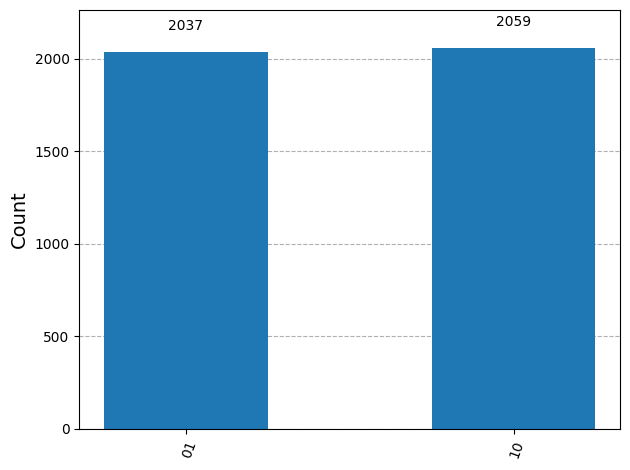

[ 0.        +0.j, 0.70710678+0.j,-0.70710678+0.j,-0.        +0.j]


In [3]:

#this creates a QuantumCircuit object with 2 qubits and
#2 output measurement bits
bell = QuantumCircuit(2, 2)

### YOUR CODE BEGINS ###

#add the unitary gates to the bell circuit
#ex: bell.h(1) applies hadamard to second qubit, bell.cx(0,1) applies
#CNOT from first to second, bell.x(0) and bell.z(1) do the obvious things.
bell.h(1)
bell.x(0)
bell.cx(1, 0)
bell.z(1)

### YOUR CODE ENDS ###

#this measures the first two qubits and saves the results
#into the 2 output bits
bell.measure([0,1], [0,1])

# visualize & run
bell.draw()
run_and_hist(bell, shots=4096)

#this will print the state vector
qc_to_sv = bell.remove_final_measurements(inplace=False)
sv = Statevector.from_instruction(qc_to_sv)
print(sv.draw("text"))


__b)__ Create a three qubit circuit that prepares the GHZ state (also known as the "cat state", after Schrodinger's cat):
$$
\frac{1}{\sqrt{2}} \ket{000} + \frac{1}{\sqrt{2}} \ket{111}
$$
and visualize the measurement outcomes.

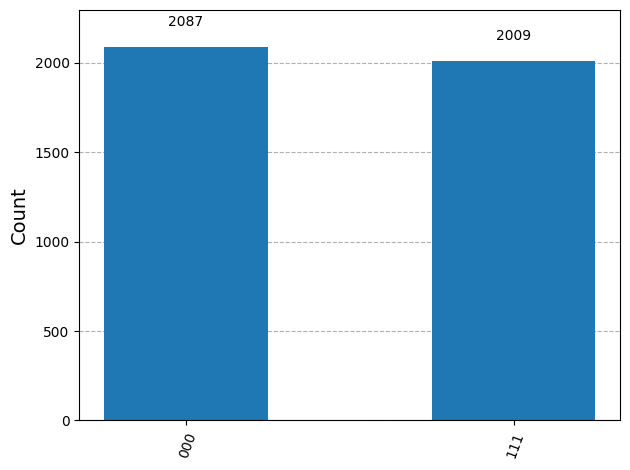

{'111': 2009, '000': 2087}

In [6]:

ghz = QuantumCircuit(3, 3)

### YOUR CODE BEGINS ###
ghz.h(0)
ghz.cx(0, 1)
ghz.cx(0, 2)

### YOUR CODE ENDS ###

ghz.measure([0,1,2], [0,1,2])

# visualize & run
ghz.draw()
run_and_hist(ghz, shots=4096)


__c)__ Create a three qubit circuit that prepares the "biased cat state":
$$
\cos(\pi/6) \ket{000} + \sin(\pi/6) \ket{111}
$$
and visualize the measurement outcomes. You may want to use the $R_y$ unitary:
$$
    R_y(\theta) = \begin{pmatrix} \cos(\theta/2) & -\sin(\theta/2) \\ \sin(\theta/2) & \cos(\theta/2) \end{pmatrix}.
$$


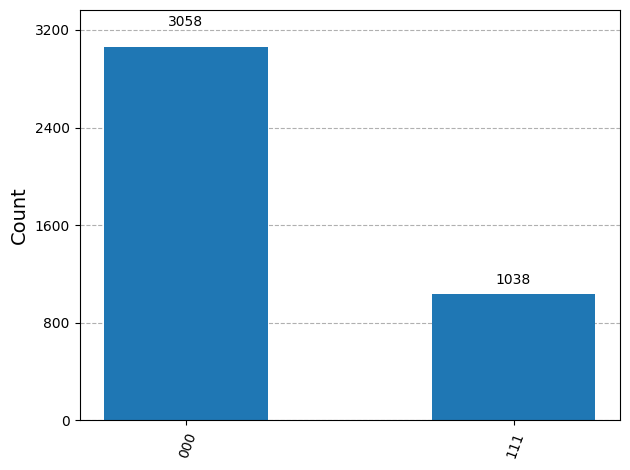

{'111': 1038, '000': 3058}

In [7]:
biased_ghz = QuantumCircuit(3, 3)

### YOUR CODE BEGINS ###

#you can call the R_y(theta) gate on qubit number b via biased_ghz.ry(theta,b).
biased_ghz.ry(np.pi/3,0)
biased_ghz.cx(0,1)
biased_ghz.cx(0,2)

### YOUR CODE ENDS ###

biased_ghz.measure([0,1,2], [0,1,2])

# visualize & run
biased_ghz.draw()
run_and_hist(biased_ghz, shots=4096)

# Problem 4: Deutsch-Jozsa

We covered the Deutsch-Jozsa algorithm in class. Now you will implement it in Qiskit and see for yourself that it works.

__a)__ Consider the function $f(x_1,x_2,x_3) = 1$ if and only if at least two of three inputs are $1$ (i.e., this is the "majority" function). By expanding its truth table you can see that it is balanced. Write a quantum circuit in qiskit, consisting only of TOFFOLI, CNOT, and X gates, perhaps using some ancilla, that cleanly implements $R_f$.

In [9]:
def majority():
    #3 input qubits, 1 target, but you can add more ancillas if you need to
    # (just change 4 to whatever you need)
    qc = QuantumCircuit(4)
    
    ###YOUR CODE BEGINS ####

    #TOFFOLI: qc.ccx(0,1,2) control on first two qubits, target on third
    #CNOT: qc.cx(0,1) control on first, target on second
    #X: qc.x(0)
    qc.ccx(0, 1, 3)
    qc.ccx(1, 2, 3)
    qc.ccx(0, 2, 3)

    ###YOUR CODE ENDS ###
    return qc

__b)__ We implemented a constant function for you ($f(x_1,x_2,x_3) = 1$ for all inputs). Below, implement the Deutsch-Jozsa algorithm and visualize the output statistics in both the balanced and constant case. See the differences?

Showing histogram for Deutsch-Jozsa with Constant oracle


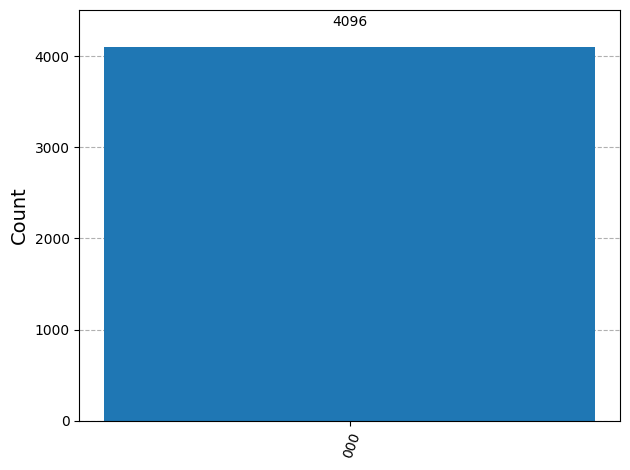

Showing histogram for Deutsch-Jozsa with Balanced oracle


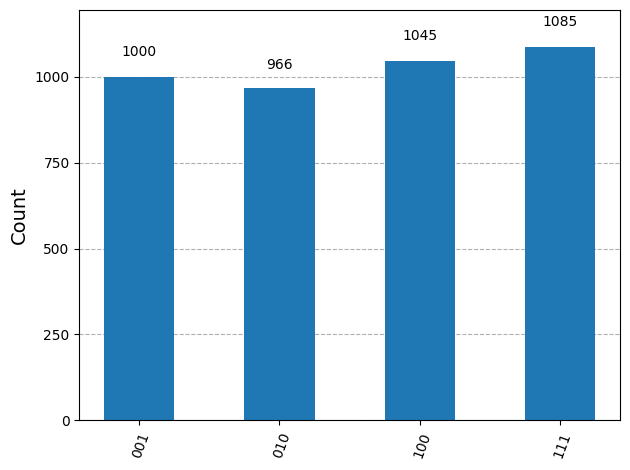

In [12]:

def constant():
    #3 input qubits, 1 target
    qc = QuantumCircuit(4)
    
    qc.x(3)    #it flips the last target bit to 1 when the target bit starts in 0
    return qc


def deutsch_jozsa(oracle):
    #You can change number of ancillas
    NUM_ANCILLAS = 0
    
    qc = QuantumCircuit(4 + NUM_ANCILLAS,3) #3 input qubits, 1 target, only measure the first three

    ### YOUR CODE BEGINS ###

    #fill in the rest here, we've included the oracle call for you
    qc.x(3)
    qc.h(0)
    qc.h(1)
    qc.h(2)
    qc.h(3)

    # the following calls the oracle
    qc.compose(oracle, inplace=True)

    qc.h(0)
    qc.h(1)
    qc.h(2)

    ### YOUR CODE ENDS ###

    # measure inputs
    qc.measure([0,1,2], [0,1,2])
    return qc

# Run and visualize
circ_bal = deutsch_jozsa(majority())
circ_const   = deutsch_jozsa(constant())

for name, circ in [("Constant", circ_const), ("Balanced", circ_bal)]:
    print("Showing histogram for Deutsch-Jozsa with " + name + " oracle")
    run_and_hist(circ, shots=4096)

    

# Problem 5: Let's Play a (Nonlocal) Game
In class we learned about the CHSH game, let's consider another game, called _Let's Confuse The Referee_.   

The game is inspired by the following simple fact: the vertices in the following graph cannot be colored red or blue such that adjacent vertices have different colors. In other words, the triangle is not $2$-colorable. 

<img src="triangle.png" width=350 />

Nonetheless, Alice and Bob decide to make a game to convince a third party, called the referee, that it _is_ possible to $2$-color a triangle. (They have a lot of time on their hands, clearly). Consider the following game:

1. Referee picks a vertex $s$ in the graph ($0$, $1$, or $2$) uniformly at random, and sends $s$ to Alice.
2. Referee picks a $t$ that is either $s$ or $s+1 \mod 3$ with $\frac{1}{2}$ probability each, and then sends $t$ to Bob. 
3. Alice and Bob have to give colors "red" or "blue" back to Referee.
4. If $s = t$, then Alice and Bob win if they give the same color. If $s \neq t$, then Alice and Bob win if they have different colors.

**a)** What is the best probability that any local hidden variable (LHV) strategy for Alice and Bob can win this game?

### Your Solution:
Alice drew a triangle and tried to avoid adjacent vertices with same color. And Bob copied this triangle. Say 0 is blue, 1 is red, and 2 is blue.
w.p. $\frac{1}{2}$, Alice and Bob get same vertex and they give correct answer.
w.p. $\frac{1}{2}$, Alice and Bob get adjacent vertices. The pairs of different color are 01, 12, while the number of all pairs is three. So win probability is $\frac{2}{3}$.

$\frac{1}{2} \cdot 1 + \frac{1}{2}\frac{2}{3} = \frac{5}{6}$

**b)** In this part you will come up with a _quantum strategy_ for Alice and Bob to beat the LHV (i.e. classical) winning probability. You will code up a strategy by specifying a measurement for Alice that depends on her question $s$, and a measurement for Bob that depends on his question $t$. We assume that Alice and Bob share a single EPR pair $\frac{1}{\sqrt{2}} \Big( \ket{00} + \ket{11} \Big)$. 

So in `alice_strategy` for example, you will write based on Alice's question $s$ (which is $0$, $1$ or $2$) what single-qubit gates Alice performs on her half of the EPR pair (which is qubit 0). Afterwards, her qubit is measured in the standard basis to obtain $0$ or $1$ (which correspond to "red" or "blue"). You will do a similar thing for Bob, except he is supposed to act on his qubit (which is qubit 1).

You're allowed to use any single-qubit gate we learned in class, or you can also make your own. For example, if you wanted Alice to apply the unitary $U = \frac{1}{2} \begin{pmatrix} 1 & \sqrt{3} \\ \sqrt{3} & -1 \end{pmatrix}$ to her qubit, then you can write

`U = np.array([[0.5,0.5*np.sqrt(3)],[0.5*np.sqrt(3),-0.5]])`

`qc.unitary(U,[0],label="Alice")`

Try to beat the LHV winning probability and get the best winning probability you can!

Hint: use the CHSH strategy for inspiration.

In [ ]:
def alice_strategy(qc, s):
    '''
        qc: QuantumCircuit object that contains two qubits. Alice should only act on qubit 0!
        s: Alice's question, which is either 0, 1, or 2
    '''
    # ========= BEGIN YOUR CODE =================
    
    if s == 0:
        pass
    elif s == 1:
        pass
    elif s == 2:
        pass
    
    # ========= END YOUR CODE =================
    return qc

def bob_strategy(qc,t):
    '''
        qc: QuantumCircuit object that contains two qubits. Bob should only act on qubit 1!
        t: Bob's question,  which is either 0, 1, or 2
    '''

    # ========= BEGIN YOUR CODE =================
    
    if t == 0:
        pass
    elif t == 1:
        pass
    elif t == 2:
        pass
        
    # ========= END YOUR CODE =================
    return qc

The following code will test how well your strategy performs.

In [ ]:
def play_game(s,t):
    #
    qc = QuantumCircuit(2,2)

    #build the EPR pair
    qc.h(0)
    qc.cx(0,1)

    #apply Alice's strategy
    qc = alice_strategy(qc,s)

    #apply Bob's strategy
    qc = bob_strategy(qc,t)

    #measure the qubits
    qc.measure([0,1],[0,1])
    
    
    total_shots = 5024
    tqc = transpile(qc, backend=backend)
    result = backend.run(qc, shots=total_shots).result()
    measurements = result.get_counts()
    
    winning_shots = 0
    if s == t:
        for measurement in measurements:
            if measurement[0] == measurement[1]:
                # Win this game
                winning_shots += measurements[measurement]
    else:
        for measurement in measurements:
            if measurement[0] != measurement[1]:
                # Win this game
                winning_shots += measurements[measurement]
    return winning_shots / total_shots

winning_probability = 0.0
for i in range(3):
    winning_probability += play_game(i, i)
    winning_probability += play_game(i, (i + 1) % 3)
print("Average Winning Probability: ", winning_probability / 6)

**c)** Describe the strategy that you chose, and algebraically compute its winning probability (i.e. carry out a calculation similar to how the quantum strategy for CHSH was analyzed in class), and confirm it matches the numerics above.

### Your Solution:

_write your solution here, using LaTeX and Markdown_